<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/BT7_FuzzyLogic_HomeWorkAI_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=eb4f4ebf46c6b383109483107eec22133ba3a91a7fe4497d38bc551efb107e65
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


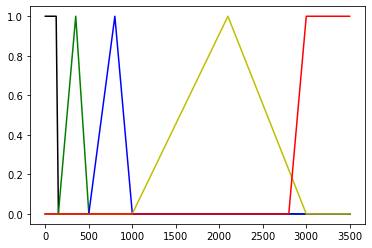

In [ ]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Tạo một mảng giá trị
x = np.arange(50,151,1)
# Động cơ có dạng tam giác --> triangle(x[a,b,c])
example1= fuzz.trapmf(x,[50,50,70,99 ])
example2= fuzz.trimf(x,[100,105,125])
example3= fuzz.trapmf(x,[125,135,150,150 ])

y = np.arange(0,21,1)

y1 = fuzz.trapmf(y,[0, 0, 3, 5])
y2 = fuzz.trimf(y,[4, 5, 7])
y3 = fuzz.trimf(y,[6, 9, 12])
y4 = fuzz.trimf(y,[11, 12, 14])
y5 = fuzz.trapmf(y,[13, 16, 20, 20])

z = np.arange(0, 3501,1)

z1 = fuzz.trapmf(z,[0, 0, 125, 150])
z2 = fuzz.trimf(z,[150, 350, 500])
z3 = fuzz.trimf(z,[500, 800, 1000])
z4 = fuzz.trimf(z,[1000, 2100, 3000])
z5 = fuzz.trapmf(z,[2800, 3000, 3500, 3500])


# Vẽ đồ thị và cho hiển thị màu 
plt.figure()
#plt.plot(x,example1,'k',linewidth=1.5,label = 'example1')
#plt.plot(x,example2,'r',linewidth=1.5,label = 'example2')
#plt.plot(x,example3,'b',linewidth=1.5,label = 'example3')

#plt.plot(y,y1,'k',linewidth=1.5,label = 'y1')
#plt.plot(y,y2,'b',linewidth=1.5,label = 'y2')
#plt.plot(y,y3,'r',linewidth=1.5,label = 'y3')
#plt.plot(y,y4,'r',linewidth=1.5,label = 'y4')
#plt.plot(y,y5,'y',linewidth=1.5,label = 'y5')

plt.plot(z,z1,'k',linewidth=1.5,label = 'z1')
plt.plot(z,z2,'g',linewidth=1.5,label = 'z2')
plt.plot(z,z3,'b',linewidth=1.5,label = 'z3')
plt.plot(z,z4,'y',linewidth=1.5,label = 'z4')
plt.plot(z,z5,'r',linewidth=1.5,label = 'z5')











102.19292156612883


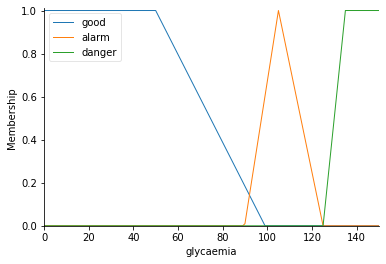

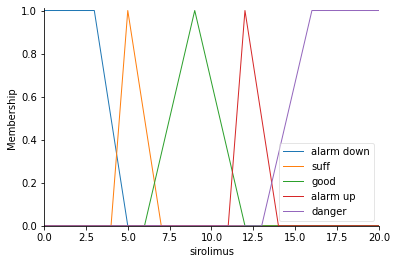

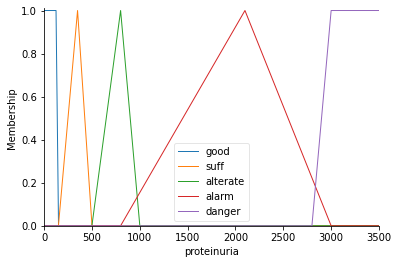

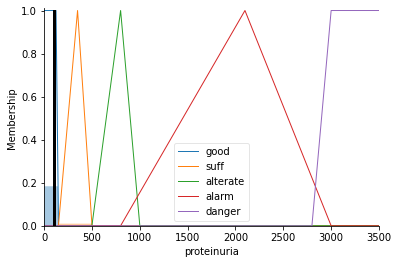

In [67]:
#ProtFIS
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

# Với biến đầu ra là proteinuria chú ý sử dụng: Consequent

glycaemia   = ctrl.Antecedent(np.arange(0,151,1),'glycaemia')
sirolimus   = ctrl.Antecedent(np.arange(0,21,1),'sirolimus')
proteinuria = ctrl.Consequent(np.arange(0,3501,1),'proteinuria')

# Tạo hàm liên thuộc
# Lấy biến glycaemia với normal --> good, impaired --> alarm,  diabetes --> danger với hàm trimf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[0,0,50,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[89.85,105,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[125,135,150,150])

# Lấy biến sirolimus với alarm down , sufficient --> suff,  good, alarm up, danger với hàm trimf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
sirolimus['alarm down'] = fuzz.trapmf(sirolimus.universe,[0, 0, 3, 5])
sirolimus['suff'] = fuzz.trimf(sirolimus.universe,[4, 5, 7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe,[6, 9, 12])
sirolimus['alarm up'] = fuzz.trimf(sirolimus.universe,[11, 12 ,14])
sirolimus['danger'] = fuzz.trapmf(sirolimus.universe,[13, 16, 20, 20])

# Lấy biến proteinuria với physiological --> alarm , light, moderate,  severe --> suff, nephrotic --> danger với hàm trimf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
proteinuria['good'] = fuzz.trapmf(proteinuria.universe,[0, 0, 125, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[150, 350, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[500, 800, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[800, 2100, 3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[2800, 3000, 3500, 3500])

glycaemia.view()
sirolimus.view()
proteinuria.view()

# Tạo luật
rule1 = ctrl.Rule(glycaemia['good'] & sirolimus['good'] , proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger'] & sirolimus['danger'] , proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good'] & sirolimus['suff'] , proteinuria['suff'])
rule4 = ctrl.Rule(glycaemia['alarm'] & sirolimus['alarm up'] , proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & sirolimus['suff'] , proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm up'] , proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm'] & sirolimus['good'] , proteinuria['suff'])
rule8 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm down'] , proteinuria['suff'])

# Thu thập dữ liệu ControlSystem
# Học dữ liệu SystemSimulation --> Truyền giá trị (đọc từ cảm biến)(thường đưa vào vòng lặp để quét)-->compute để tính toán
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['glycaemia'] = 90
tipping.input['sirolimus'] = 7.82
tipping.compute()
print(tipping.output['proteinuria'])
proteinuria.view(sim = tipping)




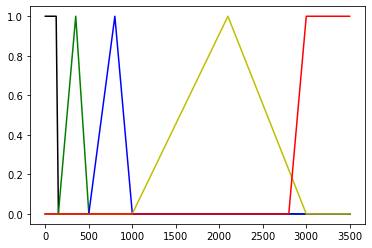

In [ ]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Tạo một mảng giá trị
x = np.arange(50,151,1)
# Động cơ có dạng tam giác --> triangle(x[a,b,c])
example1= fuzz.trapmf(x,[50,50,70,99 ])
example2= fuzz.trimf(x,[100,105,125])
example3= fuzz.trapmf(x,[125,135,150,150 ])

y = np.arange(0,21,1)

y1 = fuzz.trapmf(y,[0, 0, 3, 5])
y2 = fuzz.trimf(y,[4, 5, 7])
y3 = fuzz.trimf(y,[6, 9, 12])
y4 = fuzz.trimf(y,[11, 12, 14])
y5 = fuzz.trapmf(y,[13, 16, 20, 20])

z = np.arange(0, 3501,1)

z1 = fuzz.trapmf(z,[0, 0, 125, 150])
z2 = fuzz.trimf(z,[150, 350, 500])
z3 = fuzz.trimf(z,[500, 800, 1000])
z4 = fuzz.trimf(z,[1000, 2100, 3000])
z5 = fuzz.trapmf(z,[2800, 3000, 3500, 3500])


# Vẽ đồ thị và cho hiển thị màu 
plt.figure()
#plt.plot(x,example1,'k',linewidth=1.5,label = 'example1')
#plt.plot(x,example2,'r',linewidth=1.5,label = 'example2')
#plt.plot(x,example3,'b',linewidth=1.5,label = 'example3')

#plt.plot(y,y1,'k',linewidth=1.5,label = 'y1')
#plt.plot(y,y2,'b',linewidth=1.5,label = 'y2')
#plt.plot(y,y3,'r',linewidth=1.5,label = 'y3')
#plt.plot(y,y4,'r',linewidth=1.5,label = 'y4')
#plt.plot(y,y5,'y',linewidth=1.5,label = 'y5')

plt.plot(z,z1,'k',linewidth=1.5,label = 'z1')
plt.plot(z,z2,'g',linewidth=1.5,label = 'z2')
plt.plot(z,z3,'b',linewidth=1.5,label = 'z3')
plt.plot(z,z4,'y',linewidth=1.5,label = 'z4')
plt.plot(z,z5,'r',linewidth=1.5,label = 'z5')

45.0


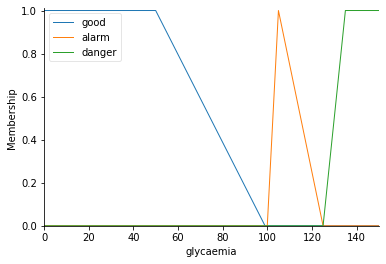

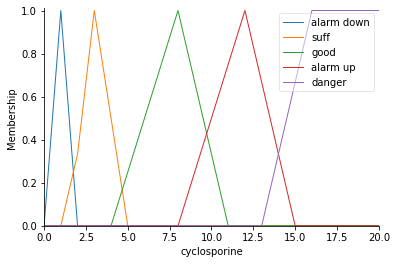

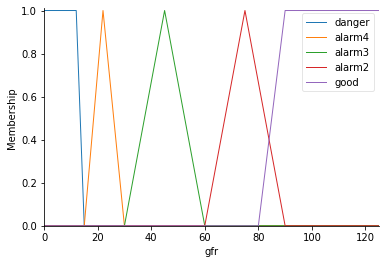

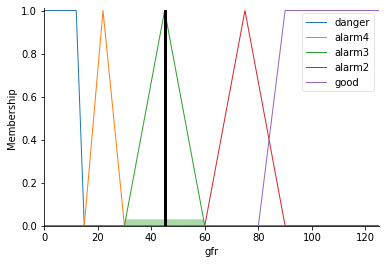

In [262]:
#GfrFIS
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

# Với biến đầu ra là proteinuria chú ý sử dụng: Consequent

glycaemia     = ctrl.Antecedent(np.arange(0,151,1),'glycaemia')
cyclosporine  = ctrl.Antecedent(np.arange(0,21,1),'cyclosporine')
gfr           = ctrl.Consequent(np.arange(0,126,1),'gfr')


# Tạo hàm liên thuộc
# Lấy biến glycaemia với normal --> good, impaired --> alarm,  diabetes --> danger với hàm trimf,trapmf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[0,0,50,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[100,105,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[125,135,150,150])

# Lấy biến cyclosporine với alarm down , sufficient --> suff,  good, alarm up, danger với hàm trimf,trapmf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
cyclosporine['alarm down'] = fuzz.trimf(cyclosporine.universe,[0, 1, 2])
cyclosporine['suff'] = fuzz.trimf(cyclosporine.universe,[1.5, 3, 5])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe,[4, 8, 11])
cyclosporine['alarm up'] = fuzz.trimf(cyclosporine.universe,[8, 12 ,15])
cyclosporine['danger'] = fuzz.trapmf(cyclosporine.universe,[13, 16, 20, 20])

# Lấy biến gfr với Stage 5 – danger, Stage 4 - Alarm 4, Stage 3 - Alarm 3,  Stage 2 - Alarm 2	, Stage 1 – good với hàm trimf,trapmf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
gfr['danger'] = fuzz.trapmf(gfr.universe,[0, 0, 12, 15])
gfr['alarm4'] = fuzz.trimf(gfr.universe,[15, 22, 30])
gfr['alarm3'] = fuzz.trimf(gfr.universe,[30, 45, 60])
gfr['alarm2'] = fuzz.trimf(gfr.universe,[60, 75, 90])
gfr['good']   = fuzz.trapmf(gfr.universe,[80, 90, 125, 125])

glycaemia.view()
cyclosporine.view()
gfr.view()


# Tạo luật
rule1 = ctrl.Rule(glycaemia['danger'] & cyclosporine['danger'] , gfr['danger'])
rule2 = ctrl.Rule(glycaemia['good'] & cyclosporine['danger'] , gfr['alarm3'])
rule3 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm up'] , gfr['alarm4'])
rule4 = ctrl.Rule(glycaemia['good'] & cyclosporine['suff'] , gfr['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & cyclosporine['good'] , gfr['good'])
rule6 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['good'] , gfr['alarm2'])
rule7 = ctrl.Rule(glycaemia['danger'] & cyclosporine['good'] , gfr['alarm3'])
#rule8 = ctrl.Rule(glycaemia['good'] & cyclosporine['alarm down'] , gfr['alarm2'])


# Thu thập dữ liệu ControlSystem
# Học dữ liệu SystemSimulation --> Truyền giá trị (đọc từ cảm biến)(thường đưa vào vòng lặp để quét)-->compute để tính toán
gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
gfring = ctrl.ControlSystemSimulation(gfr_ctrl)
gfring.input['glycaemia'] = 142
gfring.input['cyclosporine'] = 4.12
gfring.compute()
print(gfring.output['gfr'])
gfr.view(sim = gfring)


325.477626948216


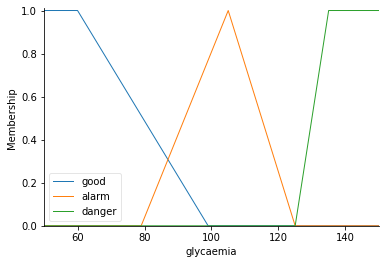

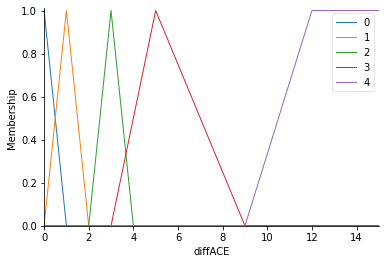

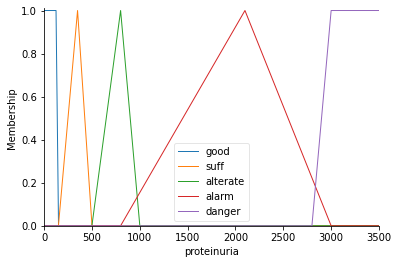

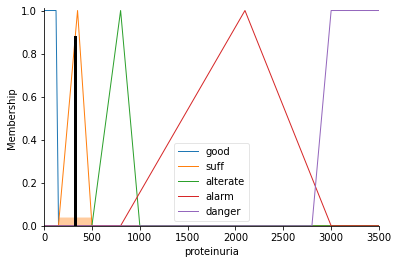

In [259]:
#ProtACE
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

# Với biến đầu ra là proteinuria chú ý sử dụng: Consequent

glycaemia   = ctrl.Antecedent(np.arange(50,151,1),'glycaemia')
diffACE     = ctrl.Antecedent(np.arange(0,16,1),'diffACE')
proteinuria = ctrl.Consequent(np.arange(0,3501,1),'proteinuria')

#Tạo hàm liên thuộc
# Lấy biến glycaemia với normal --> good, impaired --> alarm,  diabetes --> danger với hàm trimf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[50,50,60,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[79,105,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[125,135,150,150])

# Lấy biến diffACE với 0 , 1,  2, 3, 4 với hàm trimf vaf trapmf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
diffACE['0'] = fuzz.trimf(diffACE.universe,[0, 0, 1])
diffACE['1'] = fuzz.trimf(diffACE.universe,[0, 1, 2])
diffACE['2'] = fuzz.trimf(diffACE.universe,[2, 3, 3])
diffACE['3'] = fuzz.trimf(diffACE.universe,[3, 5, 9])
diffACE['4'] = fuzz.trapmf(diffACE.universe,[9, 12, 15, 15 ])

# Lấy biến proteinuria với physiological --> alarm , light, moderate,  severe --> suff, nephrotic --> danger với hàm trimf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
proteinuria['good'] = fuzz.trapmf(proteinuria.universe,[0, 0, 125, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[150, 350, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[500, 800, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[800, 2100, 3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[2800, 3000, 3500, 3500])


glycaemia.view()
diffACE.view()
proteinuria.view()

# Tạo luật
rule1 = ctrl.Rule(glycaemia['alarm'] & diffACE['2'] , proteinuria['suff'])
rule2 = ctrl.Rule(glycaemia['good'] & diffACE['1'] , proteinuria['suff'])
rule3 = ctrl.Rule(glycaemia['alarm'] & diffACE['1'] , proteinuria['alterate'])
rule4 = ctrl.Rule(glycaemia['danger'] & diffACE['1'] , proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & diffACE['3'] , proteinuria['alarm'])
rule6 = ctrl.Rule(glycaemia['good'] & diffACE['3'] , proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['danger'] & diffACE['4'] , proteinuria['danger'])
rule8 = ctrl.Rule(glycaemia['good'] & diffACE['0'] , proteinuria['good'])

# Thu thập dữ liệu ControlSystem
# Học dữ liệu SystemSimulation --> Truyền giá trị (đọc từ cảm biến)(thường đưa vào vòng lặp để quét)-->compute để tính toán
gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
gfring = ctrl.ControlSystemSimulation(gfr_ctrl)
gfring.input['glycaemia'] = 80
gfring.input['diffACE'] = 2.5
gfring.compute()
print(gfring.output['proteinuria'])
proteinuria.view(sim = gfring)


45.00000000000003


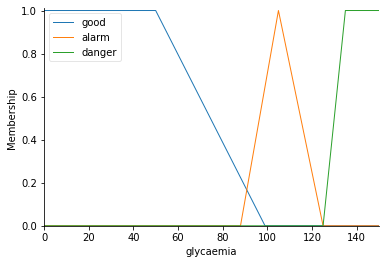

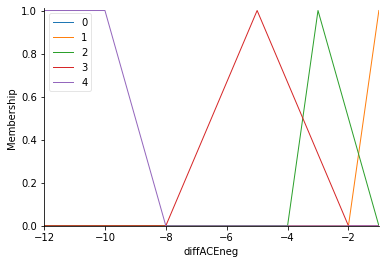

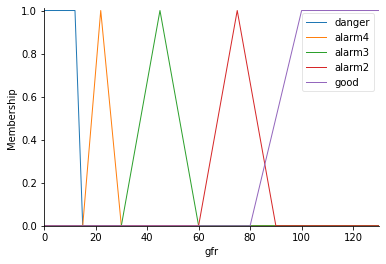

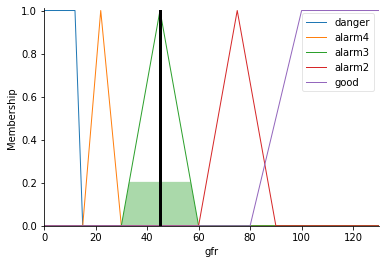

In [281]:
# GfrACE
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

# Với biến đầu ra là proteinuria chú ý sử dụng: Consequent

glycaemia     = ctrl.Antecedent(np.arange(0,151,1),'glycaemia')
diffACEneg    = ctrl.Antecedent(np.arange(-12,0,1),'diffACEneg')
gfr           = ctrl.Consequent(np.arange(0,131,1),'gfr')


# Tạo hàm liên thuộc
# Lấy biến glycaemia với normal --> good, impaired --> alarm,  diabetes --> danger với hàm trimf,trapmf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[0,0,50,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[88,105,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[125,135,150,150])

# Lấy biến diffACE với 0 , 1,  2, 3, 4 với hàm trimf vaf trapmf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
diffACEneg['0'] = fuzz.trimf(diffACEneg.universe,[-1, 0, 0])
diffACEneg['1'] = fuzz.trimf(diffACEneg.universe,[-2, -1, 0])
diffACEneg['2'] = fuzz.trimf(diffACEneg.universe,[-4, -3, -1])
diffACEneg['3'] = fuzz.trimf(diffACEneg.universe,[-8, -5, -2])
diffACEneg['4'] = fuzz.trapmf(diffACEneg.universe,[-12,-12 ,-10 ,-8])

# Lấy biến gfr với Stage 5 – danger, Stage 4 - Alarm 4, Stage 3 - Alarm 3,  Stage 2 - Alarm 2	, Stage 1 – good với hàm trimf,trapmf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
gfr['danger'] = fuzz.trapmf(gfr.universe,[0, 0, 12, 15])
gfr['alarm4'] = fuzz.trimf(gfr.universe,[15, 22, 30])
gfr['alarm3'] = fuzz.trimf(gfr.universe,[30, 45, 60])
gfr['alarm2'] = fuzz.trimf(gfr.universe,[60, 75, 90])
gfr['good']   = fuzz.trapmf(gfr.universe,[80, 100, 130, 130])

glycaemia.view()
diffACEneg.view()
gfr.view()

# Tạo luật
rule1 = ctrl.Rule(glycaemia['good'] & diffACEneg['2'] , gfr['alarm3'])
rule2 = ctrl.Rule(glycaemia['alarm'] & diffACEneg['2'] , gfr['alarm3'])
rule3 = ctrl.Rule(glycaemia['good'] & diffACEneg['1'] , gfr['alarm2'])
rule4 = ctrl.Rule(glycaemia['alarm'] & diffACEneg['1'] , gfr['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & diffACEneg['3'] , gfr['alarm3'])
rule6 = ctrl.Rule(glycaemia['danger'] & diffACEneg['3'] , gfr['alarm4'])
rule7 = ctrl.Rule(glycaemia['good'] & diffACEneg['4'] , gfr['alarm2'])
rule8 = ctrl.Rule(glycaemia['good'] & diffACEneg['0'] , gfr['good'])
rule9 = ctrl.Rule(glycaemia['danger'] & diffACEneg['4'] , gfr['danger'])

# Thu thập dữ liệu ControlSystem
# Học dữ liệu SystemSimulation --> Truyền giá trị (đọc từ cảm biến)(thường đưa vào vòng lặp để quét)-->compute để tính toán
gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
gfring = ctrl.ControlSystemSimulation(gfr_ctrl)
gfring.input['glycaemia'] = 89
gfring.input['diffACEneg'] = -2.5
gfring.compute()
print(gfring.output['gfr'])
gfr.view(sim = gfring)
